## K Nearest Neighbors
### Optimal n_neighbors= 7

In [1]:
import sklearn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Import and split data into test and train
df=pd.read_csv(r'/Users/Melanie/Downloads/QSARRegressionDataFinal.csv')

train= df[df['Set']=='Train']
test= df[df['Set']=='Test']

x_train= train[train.columns[5:27]]
y_train=train.loc[:,'logBCF']

x_test= test[test.columns[5:27]]
y_test=test.loc[:,'logBCF']

x=df[test.columns[5:27]]
y= df.loc[:, 'logBCF']


df.describe()

,Numbering,Unnamed: 4,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],...,numRings,numDbonds,numTbonds,numHalo,numSulf,numP,numSi,numSn,MW,logBCF
count,779.000000,0.0,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,...,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,389.000000,NaN,1.754814,3.467616,1.550822,0.236881,3.201746,1.510295,0.186136,0.423620,...,1.505777,0.820282,0.047497,1.801027,0.216945,0.093710,0.007702,0.010270,248.951015,2.062773
std,225.022221,NaN,1.985866,2.983778,0.958708,0.149319,1.595702,0.834753,0.501937,0.494449,...,1.001749,1.060411,0.246421,2.887380,0.600274,0.291612,0.151911,0.112906,108.342333,1.351290
min,0.000000,NaN,0.000000,0.000000,0.000000,0.090000,-1.960000,0.080000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.026215,-1.700000
25%,194.500000,NaN,0.000000,0.000000,1.210000,0.170000,2.190000,0.910000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.047678,0.985000
50%,389.000000,NaN,1.000000,4.263000,1.400000,0.200000,3.130000,1.270000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,232.082348,2.030000
75%,583.500000,NaN,3.000000,6.250000,2.285000,0.240000,4.235000,2.020000,0.000000,1.000000,...,2.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,315.519171,2.950000
max,778.000000,NaN,12.000000,9.316000,5.900000,2.230000,8.320000,7.190000,3.000000,1.000000,...,5.000000,6.000000,2.000000,35.000000,6.000000,1.000000,4.000000,2.000000,949.178286,6.060000


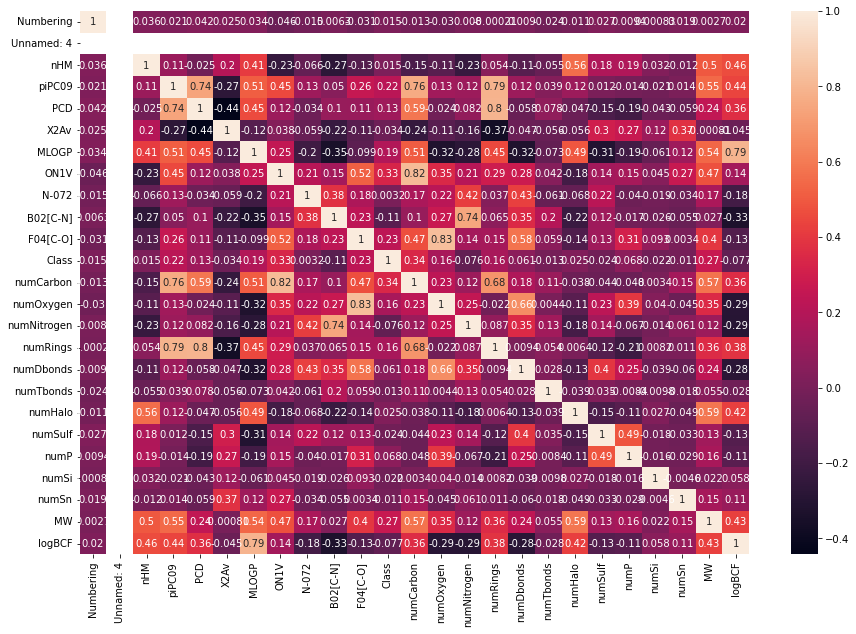

In [13]:
correlation= df.corr()
# print(correlation)
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True)
plt.show()

In [3]:
# Find best number of neighbors
neighbors= {"n_neighbors": range(1, 100)}
grid_search= GridSearchCV(KNeighborsRegressor(), neighbors)
grid_search.fit(x_train, y_train)
grid_search.best_params_


{'n_neighbors': 3}

In [4]:
# Create model and find mean square error
model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train, y_train)
y_predict= model.predict(x_test)
score= model.score(x_test, y_test)
mean_sqre= mean_squared_error(y_test, y_predict)
#     print("# of Neighbors: {}  MSE:{} RMS:{}".format(i+1, mean_sqre,math.sqrt(mean_sqre)))
print("Unprocessed Data:\n  # of Neighbors: {}\n   MSE: {}\n   RMS: {}".format(3, mean_sqre, math.sqrt(mean_sqre)))
print("   R2: ", score)

Unprocessed Data:
  # of Neighbors: 3
   MSE: 0.8025166951566951
   RMS: 0.8958329616377683
   R2:  0.5870451563545374


In [5]:
# Scale data to improve mean square error
scaler= StandardScaler().fit(x_train)
x_train_s= scaler.transform(x_train)
x_test_s= scaler.transform(x_test)

In [6]:
# Find best number of neighbors for scaled data
neighbors= {"n_neighbors": range(1, 100)}
grid_search= GridSearchCV(KNeighborsRegressor(), neighbors)
grid_search.fit(x_train_s, y_train)
grid_search.best_params_

# model = KNeighborsRegressor(n_neighbors=3)
# model.fit(x_train, y_train)
# y_predict= model.predict(x_test)

{'n_neighbors': 7}

In [7]:
# Create model 
model = KNeighborsRegressor(n_neighbors=7)
model.fit(x_train_s, y_train)
y_predict= model.predict(x_test_s)
score= model.score(x_test_s, y_test)

mean_sqre= mean_squared_error(y_test, y_predict)
print("Processed Data:\n# of Neighbors: {}\n MSE: {}\n RMS: {}".format(7, mean_sqre,math.sqrt(mean_sqre)))
print(" R2: ", score)

Processed Data:
# of Neighbors: 7
 MSE: 0.4526031815803244
 RMS: 0.6727578922467758
 R2:  0.7671018220419106
